<a href="https://colab.research.google.com/github/GeremiaPompei/ISPR/blob/main/ISPR_midterm3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ISPR Midterm 3 - Assignment 2 - Pompei Geremia (MAT. 638432)

## Code

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import datasets, layers, models

tf.device('/device:GPU:0')

Splitting of dataset in train, validation and test set. Images are normalized. After normalization they have values between 0 and 1

In [2]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

test_size = int(round(0.5 * len(test_images), 0))

train_images = train_images / 255.0
val_images = test_images[:-test_size] / 255.0
test_images = test_images[-test_size:] / 255.0

val_labels = test_labels[:-test_size]
test_labels = test_labels[-test_size:]

Prediction of the deep learning model will be an index corresponding to the class choose for a certain image. The following are the labels assigned to each index of classes

In [3]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

These are some images of train set with their label. They have a blur effect because they are 32 x 32 images

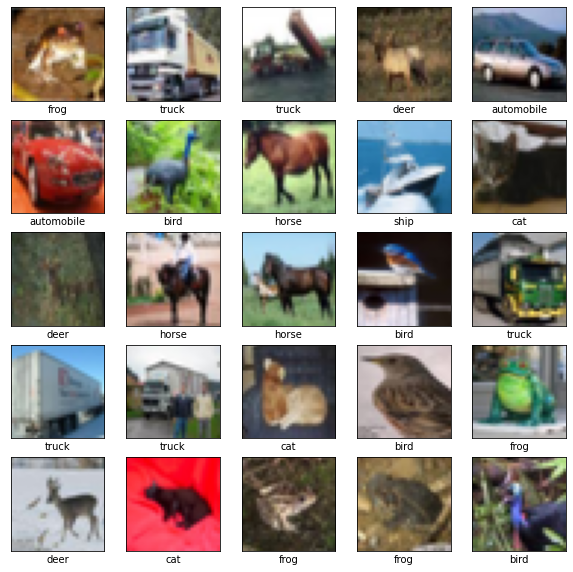

In [4]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

Function used to plot images with their prediction probabilities according the different classes

In [5]:
def plot_predictions(data):
  plt.figure(figsize=(18,5))
  size = sum([1 if prediction is None else 2 for test_image, test_label, prediction in data])
  dec = 0
  for i, value in enumerate(data):
    test_image, test_label, prediction = value
    plt.subplot(1, size, (i+1)*2-1 + dec)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(test_image)
    if prediction is not None and test_label is not None:
      plt.xlabel(f"[PRED={class_names[prediction.argmax()]} ({round(prediction.max()*100, 2)}%), LABEL={class_names[test_label]}]")
    if prediction is not None:
      plt.subplot(1, size, (i+1)*2 + dec)
      plt.ylim(0, 1)
      plt.bar(class_names, prediction, align='center')
      plt.xticks(rotation='vertical')
    else:
      dec -= 1
  plt.show()

## Analysis

### 1. Deep learning model

#### Sparse connectivity


After some tests with different models it's taken this as the best.
Considerations:
- Depth: models less deep gave worse results probably because they were not able to abstract in a good way knoledge of images throw layers
- Convolutional layers: it's decided to use 2 sequential convolutional layers to abstract more the knoledge of images. It's used in each convolutional layers default stride (1, 1) because increasing this brought model to have worse behavior. The same happens increasing the size of filter from (3,3) to (5,5)
- Pooling layers: it's tried to use each average and max pooling but the second was better according to tests
- Dropout layers: at the beginning tests are done without droput but each time training phase fell in overfitting. For this reason is chosen to use dropout after each pooling

In [6]:
model = models.Sequential()
model.add(layers.Conv2D(128, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.2))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.2))

#### Dense connectivity

About dense layer is choosen to have a large layer that uses the ReLU activation function and in output layer the softmax activation function to map final results as probabilities according to classes

In [7]:
model.add(layers.Flatten())
model.add(layers.Dense(100, activation='relu'))
model.add(layers.Dense(len(class_names), activation='softmax'))

Here is shown the summary of model configurations

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 128)       3584      
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 128)       147584    
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 128)      0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 14, 14, 128)       0         
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 64)        73792     
                                                                 
 conv2d_3 (Conv2D)           (None, 10, 10, 64)        36928     
                                                        

These lines are able to compile and fit the model. It's choosen to use accuracy as metric to understand better the behavior of the performances of model

In [9]:
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(), metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=20, validation_data=(val_images, val_labels))

Epoch 1/20
1563/1563 [==============================] - 22s 11ms/step - loss: 1.5244 - accuracy: 0.4474 - val_loss: 1.1353 - val_accuracy: 0.5980
Epoch 2/20
1563/1563 [==============================] - 14s 9ms/step - loss: 1.1011 - accuracy: 0.6108 - val_loss: 0.9868 - val_accuracy: 0.6480
Epoch 3/20
1563/1563 [==============================] - 14s 9ms/step - loss: 0.9321 - accuracy: 0.6712 - val_loss: 0.8550 - val_accuracy: 0.7020
Epoch 4/20
1563/1563 [==============================] - 14s 9ms/step - loss: 0.8185 - accuracy: 0.7118 - val_loss: 0.8127 - val_accuracy: 0.7144
Epoch 5/20
1563/1563 [==============================] - 14s 9ms/step - loss: 0.7567 - accuracy: 0.7342 - val_loss: 0.7668 - val_accuracy: 0.7342
Epoch 6/20
1563/1563 [==============================] - 14s 9ms/step - loss: 0.7023 - accuracy: 0.7521 - val_loss: 0.7421 - val_accuracy: 0.7488
Epoch 7/20
1563/1563 [==============================] - 14s 9ms/step - loss: 0.6588 - accuracy: 0.7676 - val_loss: 0.8103 - val_a

Here is plotted the accuracy of validation set

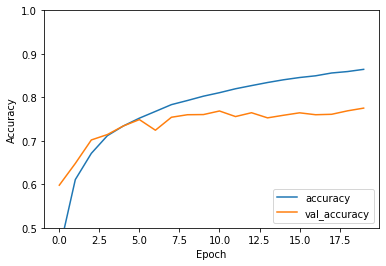

In [10]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.show()

Evaluation of the model on test set

In [11]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

157/157 - 1s - loss: 0.8058 - accuracy: 0.7654 - 584ms/epoch - 4ms/step


Here it's done a prediction using the trained model and plotted images with their own probability distribution among classes to understand better as the model classify the test images

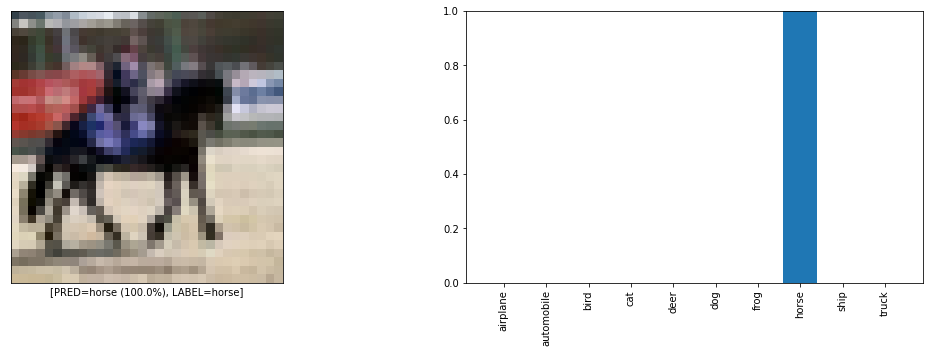

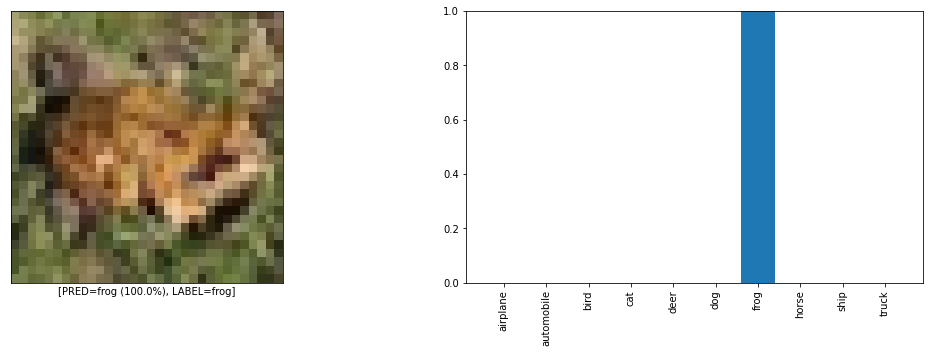

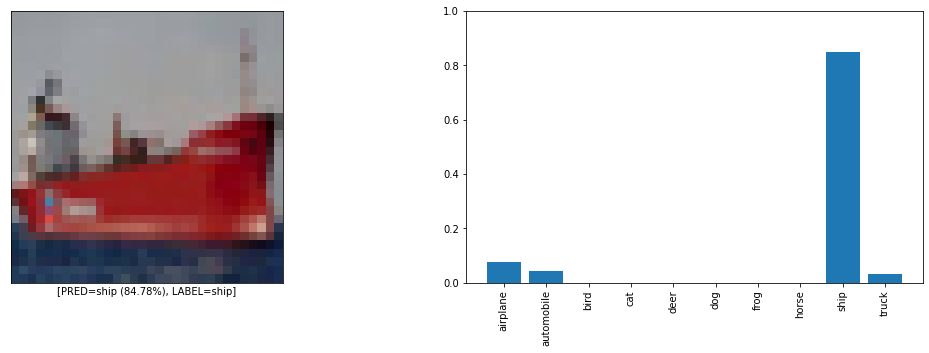

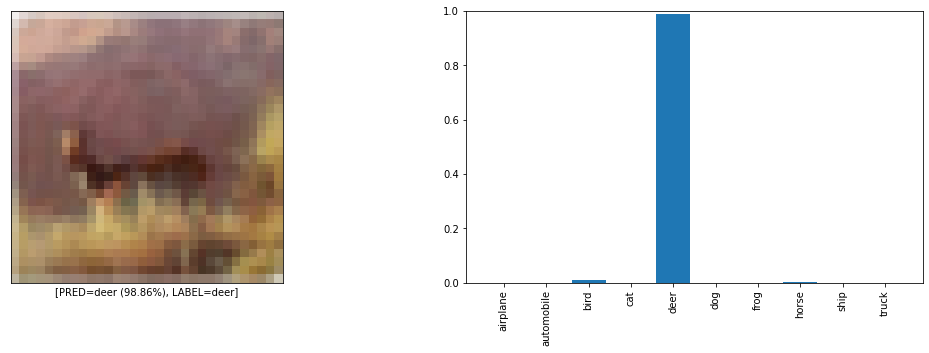

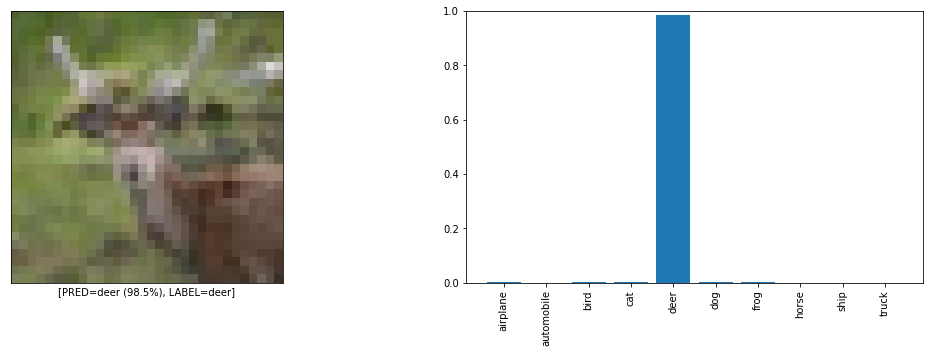

In [12]:
predictions = model.predict(test_images)

for i in range(5):
  plot_predictions([(test_images[i], test_labels[i][0], predictions[i])])

### 2. Adversarial attack

For adversarial attack is implemented **FGSM attack** that exploits signs of gradient of loss with respect attacked image to add noise to it. The noise is weighted by a parameter when is applied to the attacked image. Following function is able to compute the signes for test images

In [37]:
def create_adv_signs(limit=1000):
  tensor = tf.constant(test_images[:limit])
  with tf.GradientTape() as tape:
    tape.watch(tensor)
    prediction = model(tensor)
    loss = model.loss(test_labels[:limit], prediction)
  gradient = tape.gradient(loss, tensor)
  return tf.sign(gradient)

adv_signs = create_adv_signs()

Here is represented an example of noise that can be added to an image. The noise in this case is a tensor with dimensions 32x32x3 that has values that are -1, 0, or +1 according to the sign of gradients

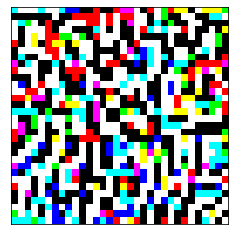

In [38]:
noise = adv_signs[0] * 0.5 + 0.5

plt.plot()
plt.xticks([])
plt.yticks([])
plt.imshow(noise)
plt.show()

Now is shown the attack done to some test images. The noise parameter is chosen very small to avoid that the added noise can be seen by human eye. There are different representation for each image
- original image
- probability distribution of model prediction of original image
- noise to attack that image
- noisy image
- probability distribution of model prediction of noisy image

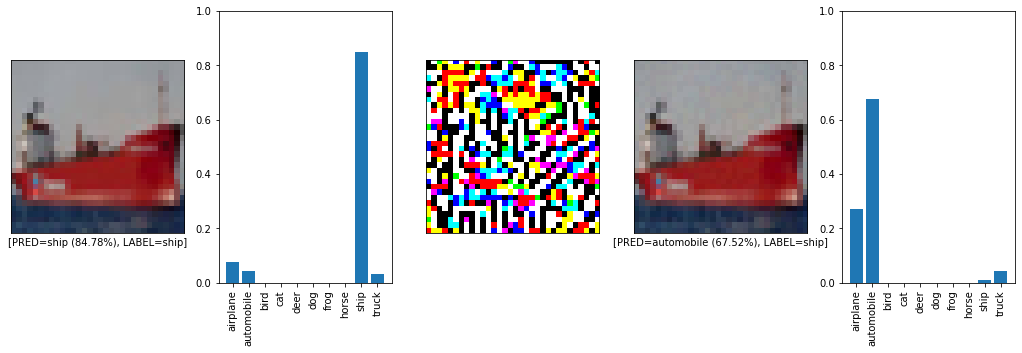

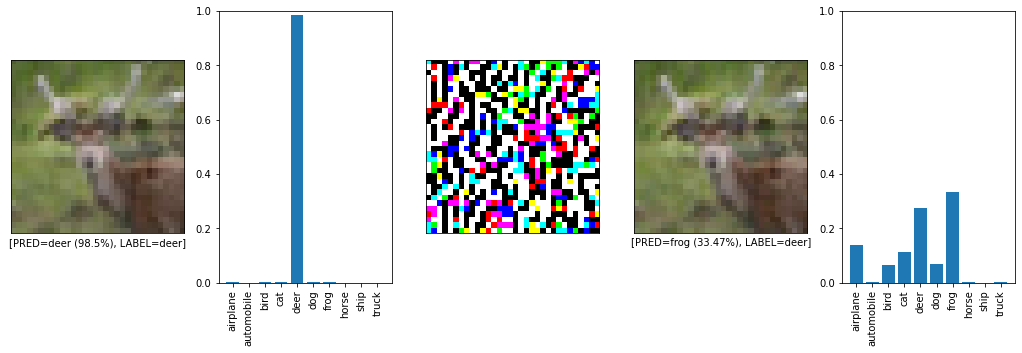

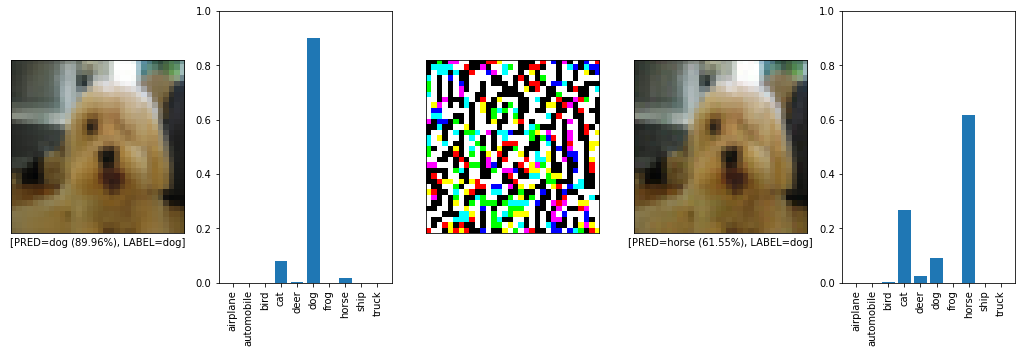

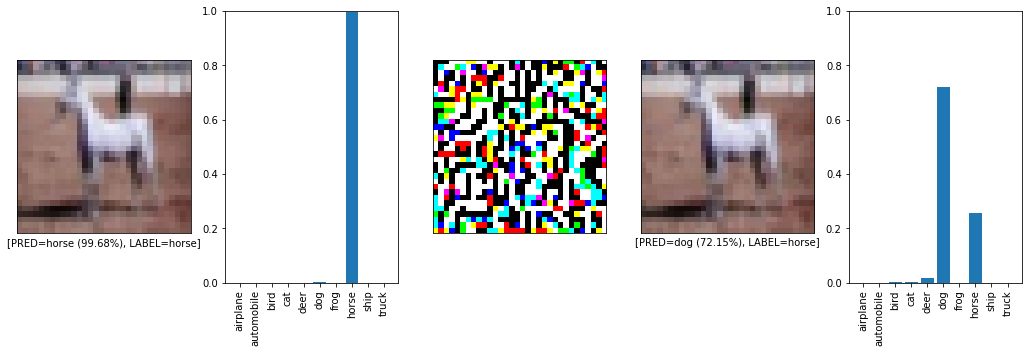

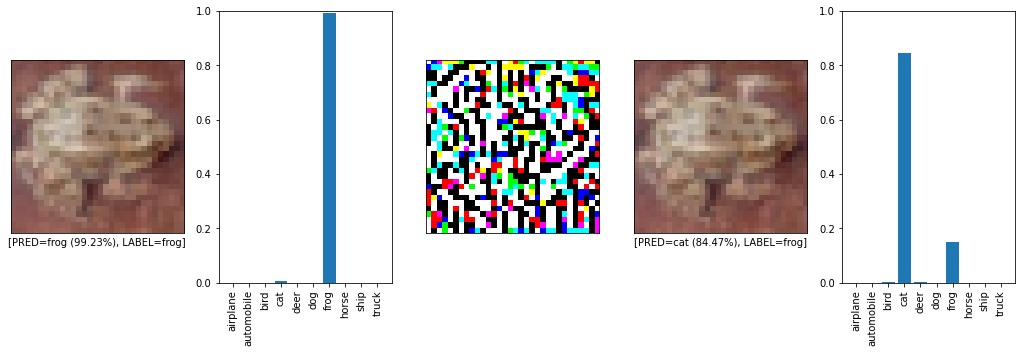

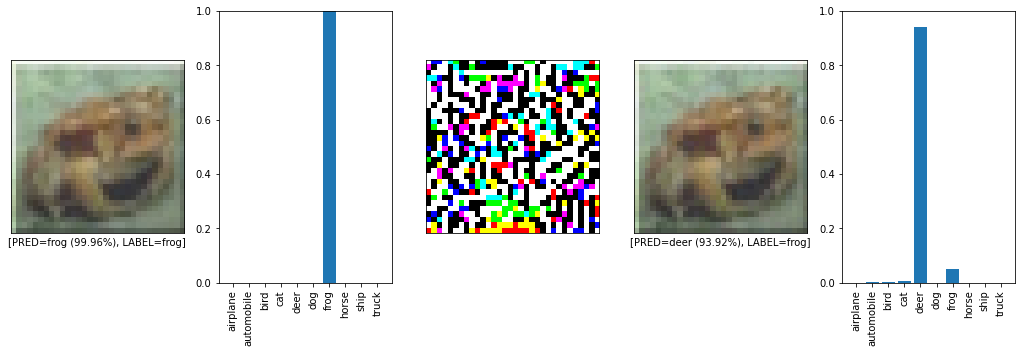

In [46]:
#@title Noise settings
noise_param = 0.01#@param {type: "slider", min:0, max:1, step:0.01}
limit = 20

noisy_test_images = np.array([
  tf.clip_by_value(img + adv_signs[i] * noise_param, 0, 1)
  for i, img in enumerate(test_images[:limit])
])
noisy_predictions = model.predict(noisy_test_images)

for i in range(limit):
  if test_labels[i][0] == predictions[i].argmax() and test_labels[i][0] != noisy_predictions[i].argmax():
    plot_predictions([
                    (test_images[i], test_labels[i][0], predictions[i]),
                    (adv_signs[i] * 0.5 + 0.5, None, None),
                    (noisy_test_images[i], test_labels[i][0], noisy_predictions[i])
                    ])

## Conclusions

1. **Deep learning model**: trying different model configurations sometimes there are slight differences in term of accuracy but the chosen model is the one that among all reach best results. The main differences throw models were according depth in term of layers and stride of kernels
2. **Adversarial attack**: in the most cases is easy attack this kind of models in this way with a very small noise parameter. With this kind of dataset that has images 32x32 the noise parameter can't be increase a lot because having small images the noise is more visible
